In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [ ]:
# Import packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
path="/content/gdrive/MyDrive/datacamp/train.csv"
train_df = pd.read_csv(path)
train_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [ ]:
train_df.shape

(24236806, 10)

In [ ]:
# Convert timestamp to date time
train_df['timestamp'] = train_df.timestamp.astype('datetime64[s]')
train_df = train_df[train_df.timestamp.dt.year==2020]
train_df = train_df[train_df.timestamp.dt.month==11]
train_df.shape

(598769, 10)

In [ ]:
train_df.dropna(inplace=True)
train_df = train_df[np.isfinite(train_df).all(1)]

In [ ]:
train_df.shape

(589955, 10)

In [ ]:
train_df.describe()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,589955.000000,589955.000000,589955.000000,589955.000000,589955.000000,589955.000000,5.899550e+05,589955.000000,589955.000000
mean,6.473456,285.892887,1320.409986,1322.450504,1318.366282,1320.418393,3.544014e+05,1320.401154,0.000027
std,4.068315,628.253640,4301.293082,4307.891268,4294.558528,4301.324037,1.416194e+06,4301.260318,0.004511
min,0.000000,1.000000,0.002451,0.002453,0.002450,0.002452,6.000000e-05,0.002452,-0.126551
25%,3.000000,28.000000,0.128017,0.128417,0.127590,0.128001,1.872239e+02,0.127994,-0.001631
50%,6.000000,80.000000,27.651600,27.671300,27.629000,27.651700,2.062042e+03,27.651692,-0.000049
75%,10.000000,262.000000,262.734500,263.210000,262.340000,262.732917,6.408410e+04,262.729967,0.001547
max,13.000000,38146.000000,19842.913750,19873.230000,19762.400000,19840.008750,1.539141e+08,19826.506346,0.089697


In [ ]:
# Create hour variable
train_df['hour'] = train_df.timestamp.dt.hour

# Create weekday variable
train_df['weekday'] = train_df.timestamp.dt.weekday

In [ ]:
train_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,hour,weekday
17714600,2020-11-01 00:01:00,3,61.0,0.092705,0.092764,0.092566,0.092626,1.658528e+05,0.092651,0.001047,0,6
17714601,2020-11-01 00:01:00,2,163.0,261.896000,262.160000,261.590000,261.904000,1.985741e+02,261.854820,-0.002429,0,6
17714602,2020-11-01 00:01:00,0,150.0,28.347800,28.362300,28.303400,28.342000,5.011629e+03,28.328415,-0.005357,0,6
17714603,2020-11-01 00:01:00,1,2445.0,13734.228920,13754.300000,13720.000000,13741.110730,2.135172e+02,13737.261551,0.000794,0,6
17714604,2020-11-01 00:01:00,4,10.0,0.002560,0.002562,0.002558,0.002561,1.174202e+05,0.002561,0.004920,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
18313364,2020-11-30 23:59:00,9,281.0,87.689714,87.880000,87.590000,87.671286,3.960266e+03,87.733833,-0.000098,23,0
18313365,2020-11-30 23:59:00,10,49.0,568.198400,569.230000,567.805800,568.227433,2.044260e+01,568.515584,-0.006150,23,0
18313366,2020-11-30 23:59:00,13,149.0,0.032355,0.032400,0.032340,0.032361,3.776827e+06,0.032367,0.000044,23,0
18313367,2020-11-30 23:59:00,12,365.0,0.202874,0.203569,0.202651,0.202946,9.302105e+05,0.203051,-0.006227,23,0


In [ ]:
import numpy as np # linear algebra
from numpy.random import seed 
import math 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime, date 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns

import warnings # Supress warnings 
warnings.filterwarnings('ignore')


One Hot Encode Categorical Variables:


Convertir variables Asset_ID, hour et weekday aux variables catégorielles et  créer one hot encoder pour ces variables catégorielles pour s'améliorer la prédiction. 

In [ ]:
# Convert Asset_ID, hour and weekday to categorical
train_df['Asset_ID'] = train_df.Asset_ID.astype('category')
train_df['hour'] = train_df.hour.astype('category')
train_df['weekday'] = train_df.weekday.astype('category')

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(train_df[['Asset_ID','hour','weekday']])

encoded_cols = list(encoder.get_feature_names(['Asset_ID','hour','weekday']))

# replace variables catégorielles avec one hot encoder
train_df[encoded_cols] = encoder.transform(train_df[['Asset_ID','hour','weekday']])

In [ ]:
# Scale variables continues `Count`, `Open`, `High`, `Low`, `Close`, `Volume`, et `VWAP` de range 0 à 1.

scaler = MinMaxScaler()

num_cols = ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

scaler.fit(train_df[num_cols])
train_df[num_cols] = scaler.transform(train_df[num_cols])

#### Time Series Plots

Le code suivant obtient la plage de temps pour chacun des `Asset_ID`.

In [ ]:
train_df.groupby(["Asset_ID"]).agg({'timestamp': [np.min,np.max]})

timestamp                    
                        amin                amax
Asset_ID                                        
0        2020-11-01 00:01:00 2020-11-30 23:59:00
1        2020-11-01 00:01:00 2020-11-30 23:59:00
2        2020-11-01 00:01:00 2020-11-30 23:59:00
3        2020-11-01 00:01:00 2020-11-30 23:59:00
4        2020-11-01 00:01:00 2020-11-30 23:59:00
5        2020-11-01 00:01:00 2020-11-30 23:59:00
6        2020-11-01 00:01:00 2020-11-30 23:59:00
7        2020-11-01 00:01:00 2020-11-30 23:59:00
8        2020-11-01 00:01:00 2020-11-30 23:59:00
9        2020-11-01 00:01:00 2020-11-30 23:59:00
10       2020-11-01 00:01:00 2020-11-30 23:59:00
11       2020-11-01 00:01:00 2020-11-30 23:59:00
12       2020-11-01 00:01:00 2020-11-30 23:59:00
13       2020-11-01 00:01:00 2020-11-30 23:59:00


La plage de dates est légèrement différente pour chacun des actifs.

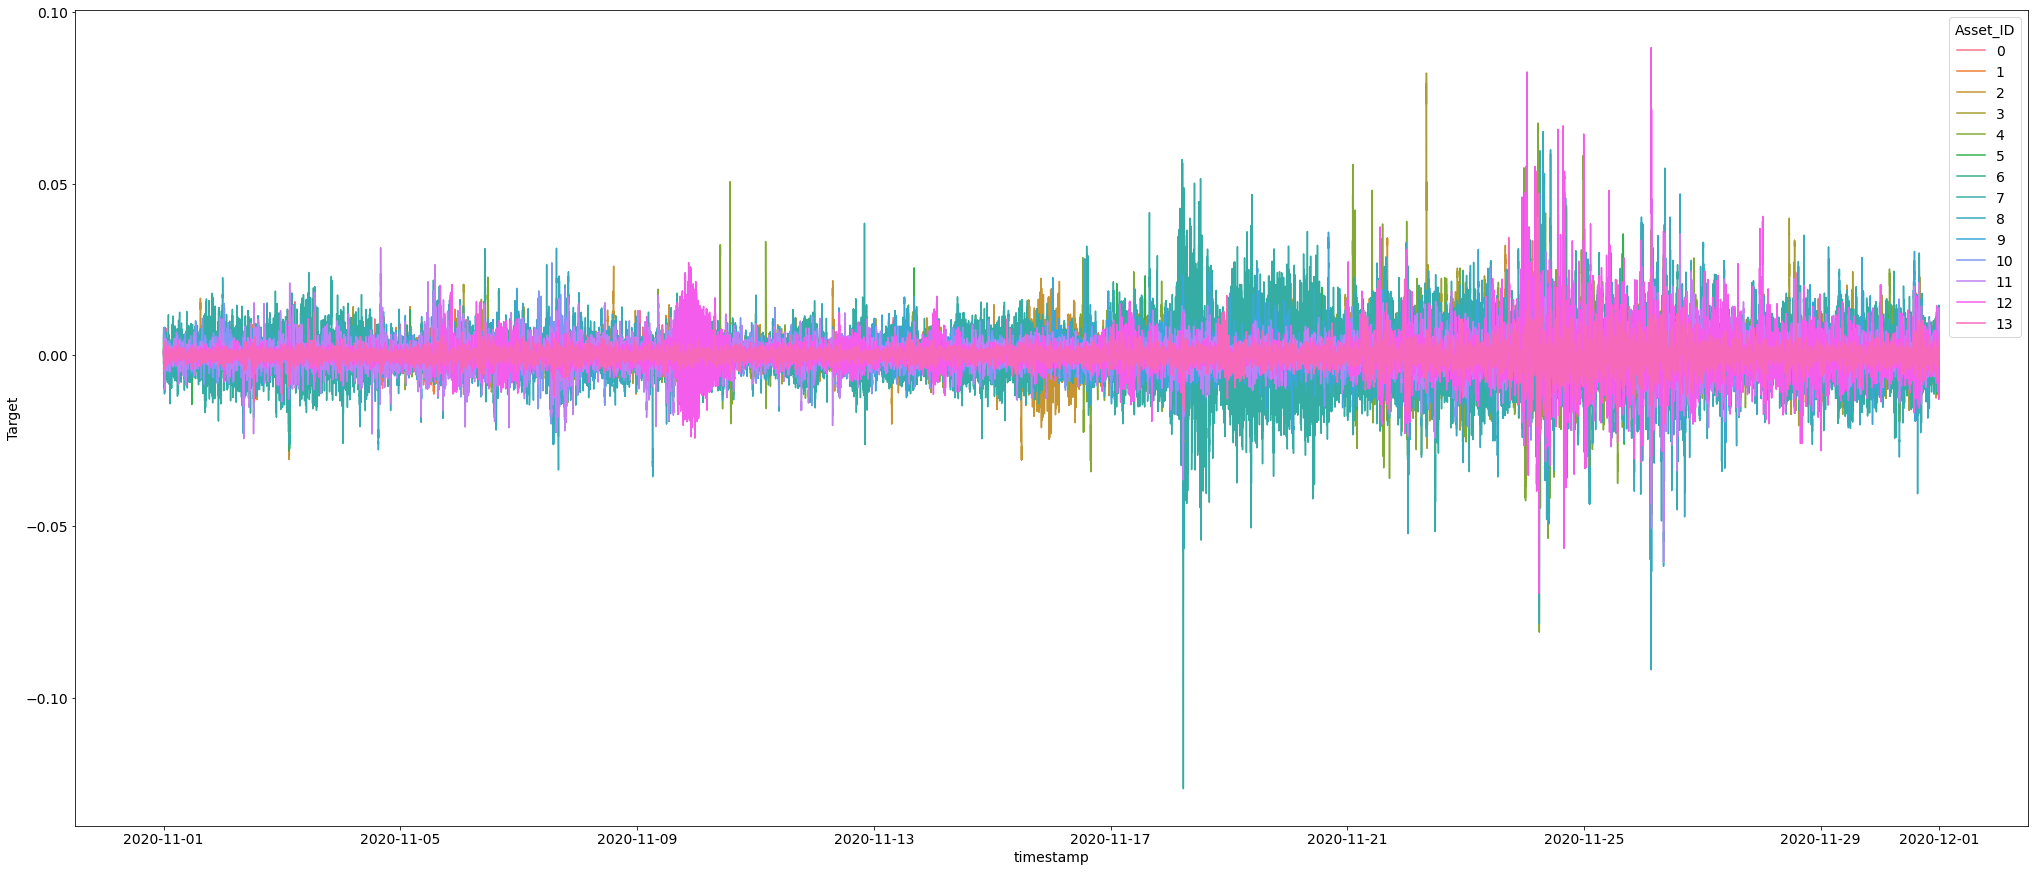

In [ ]:
plt.figure(figsize=(35, 15))
sns.lineplot(data=train_df, x="timestamp", y="Target", hue="Asset_ID")


#### Matrice de corrélation pour chaque asset


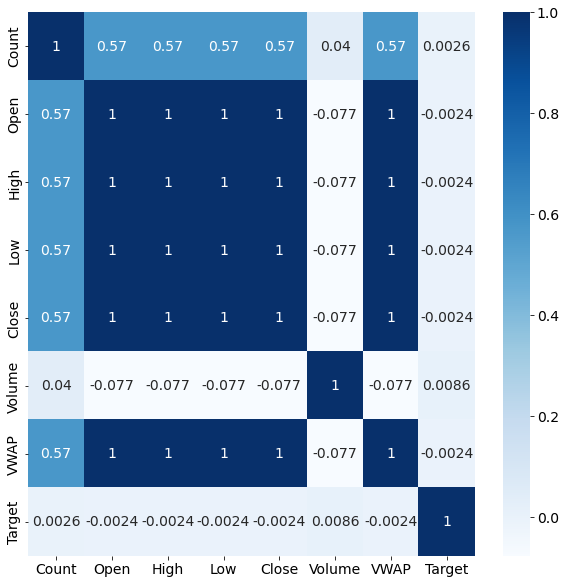

In [ ]:
corr_matrix = train_df[['Count','Open','High','Low','Close','Volume','VWAP','Target']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,annot=True, cmap='Blues');

Les variables `Open`, `High`, `Low`, `Close`, and `VWAP` sont bien corrélés.

### Séparation des données en train_set et val_set


In [ ]:
train_set = train_df[train_df.timestamp.dt.day <= 20]
val_set = train_df[train_df.timestamp.dt.day > 20]

In [ ]:
train_set.shape

(389242, 57)

In [ ]:
val_set.shape

(200713, 57)

In [ ]:
train_set.Asset_ID.value_counts()

0     28799
1     28799
2     28799
3     28799
5     28799
6     28799
9     28799
10    28799
12    28799
13    28799
7     28745
11    27874
4     26595
8     18038
Name: Asset_ID, dtype: int64

In [ ]:
val_set.Asset_ID.value_counts()


1     14400
2     14400
3     14400
5     14400
6     14400
7     14400
9     14400
10    14400
12    14400
13    14400
4     14368
11    14332
0     14329
8     13684
Name: Asset_ID, dtype: int64

In [ ]:

input_cols = num_cols + encoded_cols
target_col = 'Target'

## Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR_fit=LR.fit(train_set[input_cols], train_set[target_col])

LR_train_preds = LR_fit.predict(train_set[input_cols])
LR_val_preds = LR_fit.predict(val_set[input_cols])

LR_train_rmse = mean_squared_error(train_set[target_col], LR_train_preds, squared=False)
LR_val_rmse = mean_squared_error(val_set[target_col], LR_val_preds, squared=False)

print("Train Error is ", LR_train_rmse)
print("Validation Error is ", LR_val_rmse)

Train Error is  0.003336730935924185
Validation Error is  0.006181999951287937


## Lasso Regression:

In [ ]:
from sklearn.linear_model import Lasso

Lasso = Lasso()

Lasso_fit=Lasso.fit(train_set[input_cols], train_set[target_col])

Lasso_train_preds = Lasso_fit.predict(train_set[input_cols])
Lasso_val_preds = Lasso_fit.predict(val_set[input_cols])

Lasso_train_rmse = mean_squared_error(train_set[target_col], Lasso_train_preds, squared=False)
Lasso_val_rmse = mean_squared_error(val_set[target_col], Lasso_val_preds, squared=False)

print("Train Error is ", Lasso_train_rmse)
print("Validation Error is ", Lasso_val_rmse)

Train Error is  0.003339356650232293
Validation Error is  0.006179373888228899


## KNN:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#1h exécution
KNN = KNeighborsRegressor()

KNN_fit=KNN.fit(train_set[input_cols], train_set[target_col])

KNN_train_preds = KNN_fit.predict(train_set[input_cols])
KNN_val_preds = KNN_fit.predict(val_set[input_cols])

KNN_train_rmse = mean_squared_error(train_set[target_col], KNN_train_preds, squared=False)
KNN_val_rmse = mean_squared_error(val_set[target_col], KNN_val_preds, squared=False)

print("Train Error is ", KNN_train_rmse)
print("Validation Error is ", KNN_val_rmse)

Train Error is  0.00268343515395053
Validation Error is  0.006642118647828436


## Random Forest


In [ ]:
rf1 = RandomForestRegressor(random_state=5, n_jobs = -1)

In [ ]:
rf1_fit= rf1.fit(train_set[input_cols], train_set[target_col])
tree_train_preds = rf1.predict(train_set[input_cols])
tree_val_preds = rf1.predict(val_set[input_cols])

tree_train_rmse = mean_squared_error(train_set[target_col], tree_train_preds, squared=False)
tree_val_rmse = mean_squared_error(val_set[target_col], tree_val_preds, squared=False)

print("Train Error is ", tree_train_rmse)
print("Validation Error is ", tree_val_rmse)

Train Error is  0.0010756987696543359
Validation Error is  0.0070265793929239475


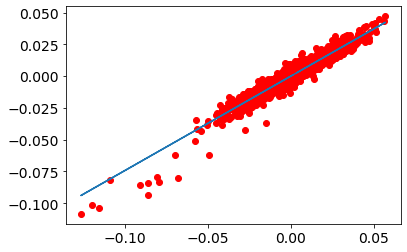

In [ ]:
plt.scatter(train_set[target_col], tree_train_preds,c = 'red')

slope, intercept = np.polyfit(train_set[target_col],tree_train_preds,1)

trend = np.polyfit(train_set[target_col],tree_train_preds,1)

trendpoly = np.poly1d(trend) 
plt.plot(train_set[target_col],trendpoly(train_set[target_col]))




plt.show()

Algorithme pour trouver les hyperparamètres pour Random Forest

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=5, n_jobs=-1, **params).fit(train_set[input_cols], train_set[target_col])
    train_rmse = mean_squared_error(model.predict(train_set[input_cols]), train_set[target_col], squared=False)
    val_rmse = mean_squared_error(model.predict(val_set[input_cols]), val_set[target_col], squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

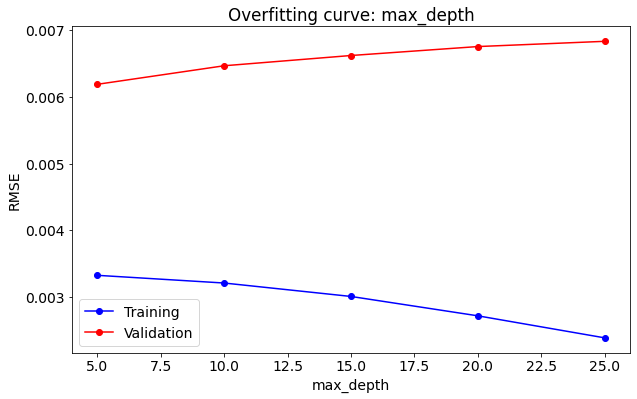

In [ ]:
# max_depth
test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

max_depth = 5 semble être le meilleur choix.

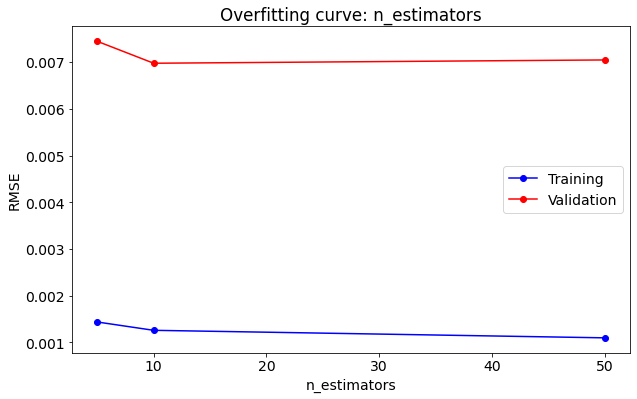

In [ ]:
# n_estimators
test_param_and_plot('n_estimators', [5, 10, 50])

n_estimator = 10 semble être le meilleur choix.

In [ ]:
rf = RandomForestRegressor(random_state=5, n_jobs = -1, max_depth=5, n_estimators=10)

rf.fit(train_set[input_cols], train_set[target_col])

tree_train_preds = rf.predict(train_set[input_cols])
tree_val_preds = rf.predict(val_set[input_cols])

tree_train_rmse = mean_squared_error(train_set[target_col], tree_train_preds, squared=False)
tree_val_rmse = mean_squared_error(val_set[target_col], tree_val_preds, squared=False)

print("Train Error is ", tree_train_rmse)
print("Validation Error is ", tree_val_rmse)

Train Error is  0.003323058937477169
Validation Error is  0.00618923461909251


On voit que le MSE de validation est réduit. 

In [ ]:
rf_importance_df = pd.DataFrame({
    'feature': train_set[input_cols].columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

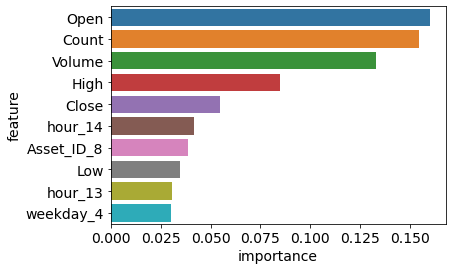

In [ ]:
sns.barplot(data=rf_importance_df.head(10), x='importance', y='feature')

Gradient Boosting :


In [ ]:
GB = XGBRegressor(objective ='reg:squarederror', booster = 'gbtree',random_state=5, n_jobs=-1, n_estimators=20, max_depth=4)

GB.fit(train_set[input_cols], train_set[target_col])

XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1,
             objective='reg:squarederror', random_state=5)

In [ ]:
GB_train_preds = GB.predict(train_set[input_cols])
GB_val_preds = GB.predict(val_set[input_cols])

GB_train_rmse = mean_squared_error(train_set[target_col], GB_train_preds, squared=False)
GB_val_rmse = mean_squared_error(val_set[target_col], GB_val_preds, squared=False)

print("Train Error is ", GB_train_rmse)
print("Validation Error is ", GB_val_rmse)

Train Error is  0.06088022309467989
Validation Error is  0.06102386172738424


Algorithme pour trouver les hyperparamètres pour GB:

In [ ]:
def test_params(**params):
    model = XGBRegressor(random_state=5, n_jobs=-1, **params).fit(train_set[input_cols], train_set[target_col])
    train_rmse = mean_squared_error(model.predict(train_set[input_cols]), train_set[target_col], squared=False)
    val_rmse = mean_squared_error(model.predict(val_set[input_cols]), val_set[target_col], squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

[15:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


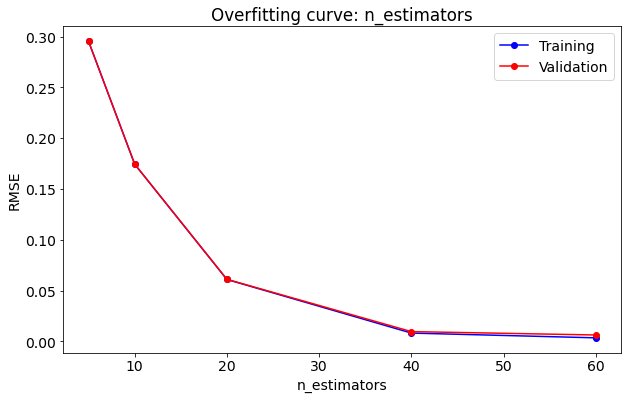

In [ ]:
# n_estimators
test_param_and_plot('n_estimators', [5, 10, 20, 40,60])

n_estimators of 40 semble d'être le meilleur choix

[15:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


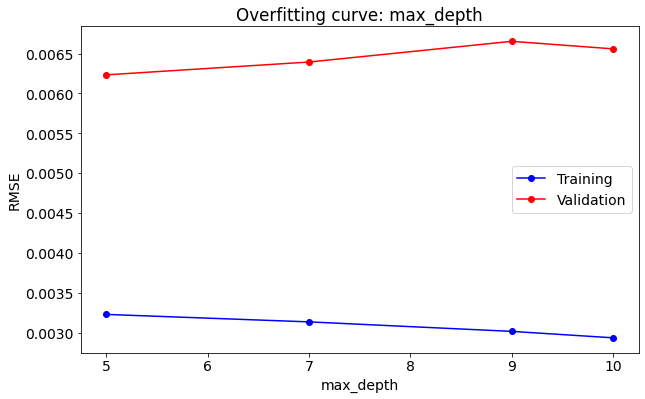

In [ ]:
# max_depth
test_param_and_plot('max_depth', [5, 7, 9, 10])

max_depth of 5 semble d'être le meilleur choix.

In [ ]:
# tuned model
GB2 = XGBRegressor(random_state=5, n_jobs=-1, n_estimators=40, max_depth=5)

GB2.fit(train_set[input_cols], train_set[target_col])

GB_train_preds = GB2.predict(train_set[input_cols])
GB_val_preds = GB2.predict(val_set[input_cols])

GB_train_rmse = mean_squared_error(train_set[target_col], GB_train_preds, squared=False)
GB_val_rmse = mean_squared_error(val_set[target_col], GB_val_preds, squared=False)

print("Train Error is ", GB_train_rmse)
print("Validation Error is ", GB_val_rmse)

[15:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Error is  0.008098360797498656
Validation Error is  0.009540584193734686


On voit que le MSE de validation est réduit.

In [ ]:
# define the model Prophet
from pandas import to_datetime
from pandas import DataFrame
train_set['timestamp']= to_datetime(train_set['timestamp'])
model = Prophet()
# fit the model

train_set.input_cols =['ds']
#model.fit(train_set[input_cols], train_set[target_col])

In [ ]:
train_set
train_set2=train_set
train_set2=train_set.iloc[:,0:10]
train_set2

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
17714600,2020-11-01 00:01:00,3,0.001573,4.548390e-06,4.544355e-06,4.559973e-06,4.545024e-06,1.077568e-03,4.549415e-06,0.001047
17714601,2020-11-01 00:01:00,2,0.004247,1.319834e-02,1.319149e-02,1.323663e-02,1.320068e-02,1.290162e-06,1.320719e-02,-0.002429
17714602,2020-11-01 00:01:00,0,0.003906,1.428487e-03,1.427038e-03,1.432061e-03,1.428404e-03,3.256122e-05,1.428692e-03,-0.005357
17714603,2020-11-01 00:01:00,1,0.064071,6.921478e-01,6.921018e-01,6.942476e-01,6.925960e-01,1.387249e-06,6.928735e-01,0.000794
17714604,2020-11-01 00:01:00,4,0.000236,5.478027e-09,5.499862e-09,5.464924e-09,5.478829e-09,7.628944e-04,5.475302e-09,0.004920
...,...,...,...,...,...,...,...,...,...,...
18112117,2020-11-20 23:59:00,9,0.006554,4.160254e-03,4.162260e-03,4.172447e-03,4.160705e-03,1.354420e-05,4.163190e-03,-0.002096
18112118,2020-11-20 23:59:00,10,0.000315,2.601485e-02,2.598458e-02,2.610653e-02,2.600724e-02,3.726320e-09,2.602898e-02,0.007395
18112119,2020-11-20 23:59:00,13,0.001599,1.201200e-06,1.201818e-06,1.205522e-06,1.201817e-06,5.734541e-03,1.202430e-06,0.003464
18112120,2020-11-20 23:59:00,12,0.002123,4.340444e-06,4.336840e-06,4.355038e-06,4.340664e-06,2.122497e-03,4.344517e-06,0.002713


In [ ]:
train_set2=train_set2.set_axis(['ds', 'Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close',
       'Volume', 'VWAP', 'y'],axis=1)



In [ ]:
train_set2['ds']= to_datetime(train_set2['ds'])

In [ ]:
model = Prophet(yearly_seasonality=True)
# fit the model
Prop_fit=model.fit(train_set2)

In [ ]:
forecast = Prop_fit.predict(train_set2)

In [ ]:
# Model Evaluation
Prop_train_preds = Prop_fit.predict(train_set['ds'])
Prop_val_preds = Prop_fit.predict(val_set['ds'])

Prop_train_rmse = mean_squared_error(train_set['ds'], Prop_train_preds, squared=False)
Prop_val_rmse = mean_squared_error(val_set['ds'], Prop_val_preds, squared=False)

print("Train Error is ", Prop_train_rmse)
print("Validation Error is ", Prop_val_rmse)